# Homemade K-Means Clustering Algorithm in Python

In [1]:
import sys
import pandas as pd
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.stats.mstats import gmean
from KMeans import KMeans
import sklearn
from sklearn.cluster import KMeans as SKKMeans

## Versions

In [2]:
print(f"Python version\n{sys.version}\n")
print("Pandas version:       ", pd.__version__)
print("NumPy version:        ", np.__version__)
print("MatPlotLib version:   ", matplotlib.__version__)
print("SciPy version:        ", scipy.__version__)
print("Sci-Kit Learn version:", sklearn.__version__)

Python version
3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]

Pandas version:        0.25.1
NumPy version:         1.17.2
MatPlotLib version:    3.1.1
SciPy version:         1.3.1
Sci-Kit Learn version: 0.22.2.post1


## Demonstration

### Randomizing Data

In [3]:
random.seed(84)
data = np.array([
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
])

data

array([[ 4,  0],
       [ 7,  0],
       [ 8, 10],
       [ 5,  3],
       [ 7,  7],
       [ 8,  5],
       [ 9,  2],
       [ 8,  4],
       [ 8,  7],
       [ 6,  5],
       [ 9,  3],
       [ 2, 10],
       [ 7,  0],
       [ 8,  0],
       [ 2,  0],
       [ 7,  8],
       [10,  4],
       [ 8,  1],
       [ 0,  3],
       [ 3,  6],
       [ 2,  4],
       [ 1,  4],
       [ 1,  1],
       [ 8,  1],
       [ 7,  8]])

In [4]:
x = []
y = []
for i, j in data:
    x.append(i)
    y.append(j)
    
x

[4, 7, 8, 5, 7, 8, 9, 8, 8, 6, 9, 2, 7, 8, 2, 7, 10, 8, 0, 3, 2, 1, 1, 8, 7]

In [5]:
y

[0, 0, 10, 3, 7, 5, 2, 4, 7, 5, 3, 10, 0, 0, 0, 8, 4, 1, 3, 6, 4, 4, 1, 1, 8]

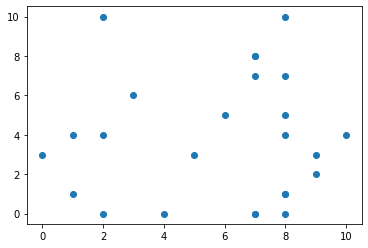

In [6]:
plt.scatter(x, y)
plt.show()

In [7]:
df = pd.DataFrame({"x" : x, "y" : y})

print(df.shape)
df

(25, 2)


,x,y
0,4,0
1,7,0
2,8,10
3,5,3
4,7,7
5,8,5
6,9,2
7,8,4
8,8,7
9,6,5


### Trying Homemade K-Means Clustering Algorithm on Data

In [8]:
# Note here that n_iter=10 is the default
# but has been expressly stated here for the reader's benefit.

kmeans = KMeans(n_clusters=3, random_state=84)
kmeans_fit = kmeans.fit(data)

print(kmeans.clusters)

[0 0 2 0 2 2 0 2 2 2 0 2 0 0 1 2 0 0 1 2 1 1 1 0 2]


/Users/samuel/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:332: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


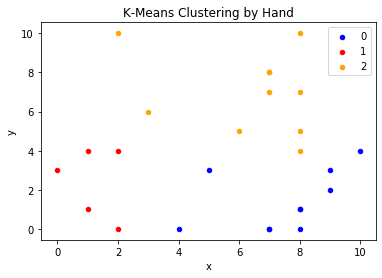

In [9]:
colors = {1 : 'red', 0 : 'blue', 2 : "orange"}

fig, ax = plt.subplots()
ax.set_title('K-Means Clustering by Hand')

grouped = df.groupby(kmeans.clusters)
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x',
               y = 'y', label = key, color = colors[key])
plt.show()

### Comparison with Sci-Kit Learn K-Means Function

In [10]:
skkmeans = SKKMeans(n_clusters=3, random_state=84)
skkmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=84, tol=0.0001, verbose=0)

So far the results are *fairly similar*. 

In [11]:
skkmeans = skkmeans.fit(data)
print(skkmeans.labels_)

[0 1 2 0 2 2 1 1 2 2 1 2 1 1 0 2 1 1 0 0 0 0 0 1 2]


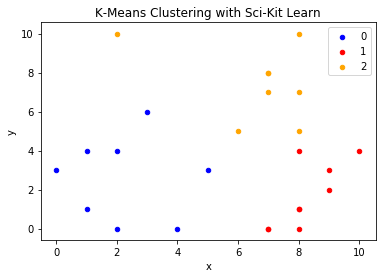

In [12]:
colors = {0 : 'blue', 1 : 'red', 2 : "orange"}

fig, ax = plt.subplots()
ax.set_title('K-Means Clustering with Sci-Kit Learn')

grouped = df.groupby(skkmeans.labels_)
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x',
               y = 'y', label = key, color = colors[key])
plt.show()

#### Key Differences:

##### n_iter used instead of max_iter
__Note above__ in that the Sci-Kit Learn implementation of the algorithm that there is a *max_iter* and *tol* hyper-parameter. In a truly dynamic implementation of K-Means Clustering, these two work together to let the program know when to stop optimizing in its search for the center of each cluster. In this case, however, the homemade implementation is less dynamic, with an *n_iter* hyper-parameter taking the place of *max_iter* and *tol* not being used entirely. The effect of this is that, by tuning, *n_iter* the programmer can see each stage of the optimization process as demonstrated below.

In [13]:
algs = []
for i in range(4):
    alg = KMeans(n_clusters=3, n_iter=i, random_state=84)
    algs.append(alg)
    alg.fit(data)
    print(alg.clusters)

[0 0 2 1 2 1 0 1 2 1 0 2 0 0 0 2 0 0 1 1 1 1 1 0 2]
[0 0 2 0 2 2 0 0 2 2 0 2 0 0 1 2 0 0 1 2 1 1 1 0 2]
[0 0 2 0 2 2 0 2 2 2 0 2 0 0 1 2 0 0 1 2 1 1 1 0 2]
[0 0 2 0 2 2 0 2 2 2 0 2 0 0 1 2 0 0 1 2 1 1 1 0 2]


/Users/samuel/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:332: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Note that the first three NumPy arrays containing the clusters change with each successive itteration; whereas, the fourth is identical to the third. Given that all successive itterations --including those beyond four--- would be equal to the third, this indicates that the algorith has converged.

Let's visualize this below.

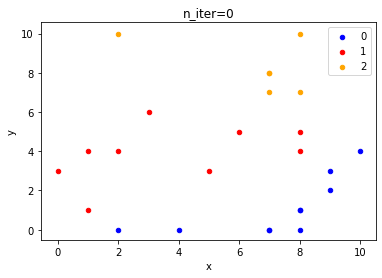

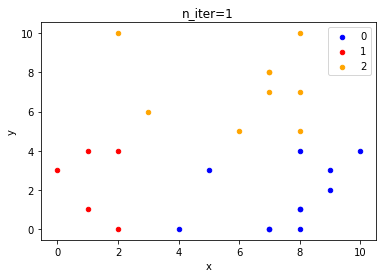

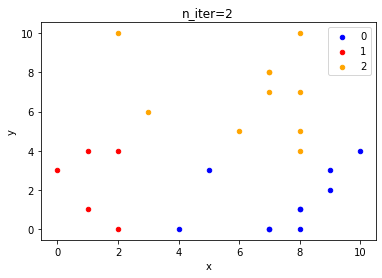

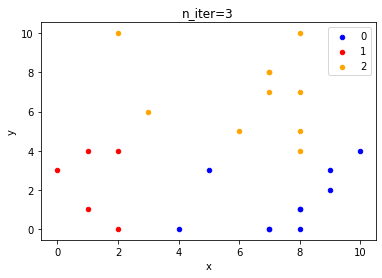

In [14]:
colors = {0 : 'blue', 1 : 'red', 2 : "orange"}

for alg in algs:
    fig, ax = plt.subplots()
    ax.set_title(f'n_iter={algs.index(alg)}')
    
    grouped = df.groupby(alg.clusters)
    for key, group in grouped:
        group.plot(ax = ax, kind = 'scatter', x = 'x',
                   y = 'y', label = key, color = colors[key])
        
    plt.show()

##### Homemade Algorithm doesn't always deliver number of clusters desired.

Examining the number of cluster IDs which actually appear in the algorithm.cluster attribute below as n_clusters raises, one finds that Homemade Algorithm sometimes fails to produce a matching number of clusters. This is especially true for smaller datasets with higher *n_cluster* values.

In [15]:
algorithms = []
for i in range(3, 6):
    alg = KMeans(n_clusters=i, n_iter=10, random_state=84)
    algorithms.append(alg)
    alg.fit(data)
    print(alg.clusters)

[0 0 2 0 2 2 0 2 2 2 0 2 0 0 1 2 0 0 1 2 1 1 1 0 2]
[3 0 2 2 2 2 0 2 2 2 0 2 0 0 3 2 0 0 1 2 1 1 3 0 2]
[3 0 2 2 2 2 0 2 2 2 0 2 0 0 3 2 0 0 1 2 1 1 3 0 2]


In [89]:
for algorithm in algorithms:
    print(f"n_clusters={algorithms.index(algorithm) + 3}, {len(list(set(algorithm.clusters)))}")

n_clusters=3, 3
n_clusters=4, 4
n_clusters=5, 4
